# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [82]:
# Import libraries
import pandas as pd
import numpy as np

# Scipy
import scipy

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import svm

import catboost as cat # --> poderosísimo CATBOOST!

# Metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, NMF
from pandas import qcut, cut
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model summaries n shit
import statsmodels.api as sm

# Datetime
from datetime import datetime as dt

## Ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Your code here
data=pd.read_csv('data_all.csv')
data

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116318,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116319,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data_array=np.array(data)

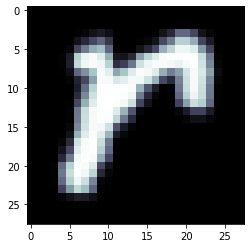

In [62]:
fig, ax = plt.subplots()
ax.imshow(data_array[754,1:].reshape(28, 28), cmap=plt.cm.bone, interpolation='nearest') 

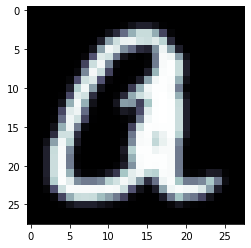

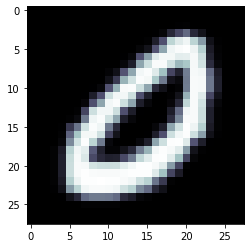

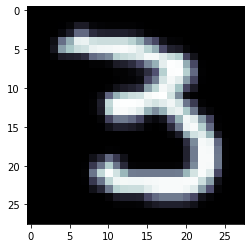

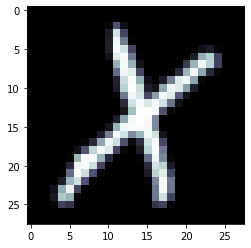

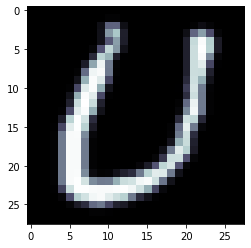

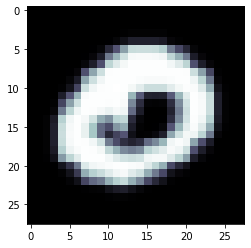

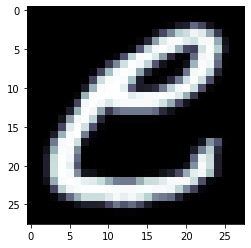

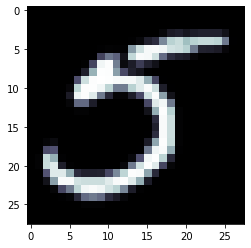

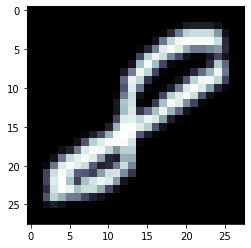

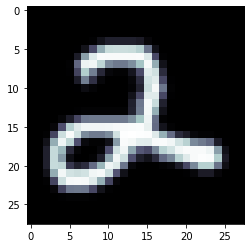

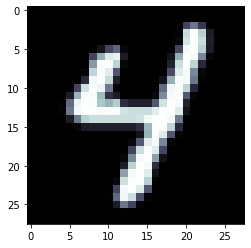

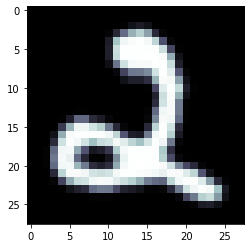

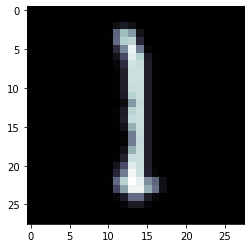

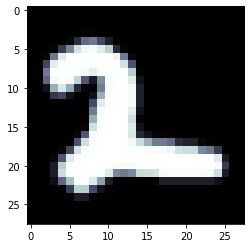

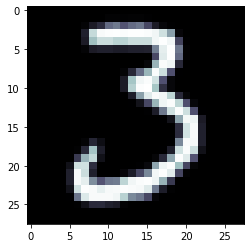

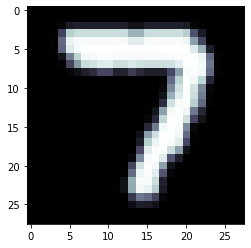

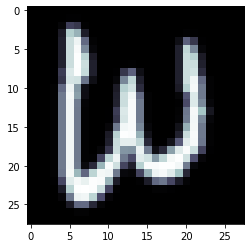

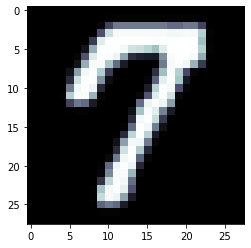

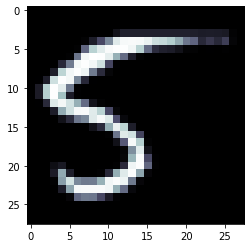

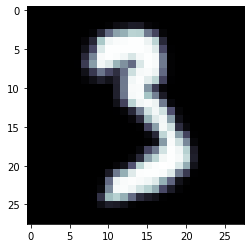

In [59]:
for i in range(20):
    fig, ax = plt.subplots()
    ax.imshow(data_array[i,1:].reshape(28, 28), cmap=plt.cm.bone, interpolation='nearest') 

In [60]:
data['e'][:20]

0     36.0
1      0.0
2      3.0
3     33.0
4     30.0
5     24.0
6     40.0
7      5.0
8      8.0
9      2.0
10     4.0
11     2.0
12    47.0
13     2.0
14     3.0
15     7.0
16    32.0
17     7.0
18     5.0
19     3.0
Name: e, dtype: float64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [11]:
data.columns

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [65]:
# Your code here
classify={}

for i in data['e']:
    if i<10:
        classify[f'{i}']=('Number')
    elif i>10 and i<36:
        classify[f'{i}']=('Uppercase')
    else:
        classify[f'{i}']=('Lowercase')
        
classify
        

{'36.0': 'Lowercase',
 '0.0': 'Number',
 '3.0': 'Number',
 '33.0': 'Uppercase',
 '30.0': 'Uppercase',
 '24.0': 'Uppercase',
 '40.0': 'Lowercase',
 '5.0': 'Number',
 '8.0': 'Number',
 '2.0': 'Number',
 '4.0': 'Number',
 '47.0': 'Lowercase',
 '7.0': 'Number',
 '32.0': 'Uppercase',
 '60.0': 'Lowercase',
 '18.0': 'Uppercase',
 '46.0': 'Lowercase',
 '59.0': 'Lowercase',
 '12.0': 'Uppercase',
 '37.0': 'Lowercase',
 '53.0': 'Lowercase',
 '15.0': 'Uppercase',
 '1.0': 'Number',
 '9.0': 'Number',
 '38.0': 'Lowercase',
 '43.0': 'Lowercase',
 '44.0': 'Lowercase',
 '19.0': 'Uppercase',
 '55.0': 'Lowercase',
 '6.0': 'Number',
 '58.0': 'Lowercase',
 '41.0': 'Lowercase',
 '20.0': 'Uppercase',
 '29.0': 'Uppercase',
 '28.0': 'Uppercase',
 '31.0': 'Uppercase',
 '42.0': 'Lowercase',
 '39.0': 'Lowercase',
 '25.0': 'Uppercase',
 '49.0': 'Lowercase',
 '35.0': 'Uppercase',
 '14.0': 'Uppercase',
 '57.0': 'Lowercase',
 '34.0': 'Uppercase',
 '26.0': 'Uppercase',
 '61.0': 'Lowercase',
 '11.0': 'Uppercase',
 '13.0

In [71]:
classify

{'36.0': 'Lowercase',
 '0.0': 'Number',
 '3.0': 'Number',
 '33.0': 'Uppercase',
 '30.0': 'Uppercase',
 '24.0': 'Uppercase',
 '40.0': 'Lowercase',
 '5.0': 'Number',
 '8.0': 'Number',
 '2.0': 'Number',
 '4.0': 'Number',
 '47.0': 'Lowercase',
 '7.0': 'Number',
 '32.0': 'Uppercase',
 '60.0': 'Lowercase',
 '18.0': 'Uppercase',
 '46.0': 'Lowercase',
 '59.0': 'Lowercase',
 '12.0': 'Uppercase',
 '37.0': 'Lowercase',
 '53.0': 'Lowercase',
 '15.0': 'Uppercase',
 '1.0': 'Number',
 '9.0': 'Number',
 '38.0': 'Lowercase',
 '43.0': 'Lowercase',
 '44.0': 'Lowercase',
 '19.0': 'Uppercase',
 '55.0': 'Lowercase',
 '6.0': 'Number',
 '58.0': 'Lowercase',
 '41.0': 'Lowercase',
 '20.0': 'Uppercase',
 '29.0': 'Uppercase',
 '28.0': 'Uppercase',
 '31.0': 'Uppercase',
 '42.0': 'Lowercase',
 '39.0': 'Lowercase',
 '25.0': 'Uppercase',
 '49.0': 'Lowercase',
 '35.0': 'Uppercase',
 '14.0': 'Uppercase',
 '57.0': 'Lowercase',
 '34.0': 'Uppercase',
 '26.0': 'Uppercase',
 '61.0': 'Lowercase',
 '11.0': 'Uppercase',
 '13.0

In [69]:
data['class']=(data['e'].astype('str')).map(classify)

In [70]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,class
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lowercase
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Number
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Number
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Uppercase
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Uppercase


In [110]:
data['is_uppercase']=np.where(data['class']=='Uppercase',1,0)
data['is_lowercase']=np.where(data['class']=='Lowercase',1,0)
data['is_number']=np.where(data['class']=='Number',1,0)
data.head()

,e,1,2,3,4,5,6,7,8,9,...,779,780,781,782,783,784,class,is_uppercase,is_lowercase,is_number
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Lowercase,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Number,0,0,1
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Number,0,0,1
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Uppercase,1,0,0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Uppercase,1,0,0


In [75]:
data['class'].value_counts(normalize=True)

Number       0.497911
Uppercase    0.260338
Lowercase    0.241751
Name: class, dtype: float64

In [ ]:
data.columns

In [77]:
X=data.drop(['e','class'], axis = 1)
y=data['class']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [83]:

dt_fit = DecisionTreeClassifier()
log_fit = LogisticRegression()
knn_fit = KNeighborsClassifier(n_neighbors=5)
cat_fit = cat.CatBoostClassifier(iterations=500, depth=3, od_type="Iter", 
                                     od_wait=50, verbose = False)
rfor_fit= RandomForestClassifier()
    


In [85]:
dt_fit.fit(X_train,y_train)
log_fit.fit(X_train,y_train)
knn_fit.fit(X_train,y_train)
cat_fit.fit(X_train,y_train)
rfor_fit.fit(X_train,y_train)
    

RandomForestClassifier()

In [97]:
dt_pred=dt_fit.predict(X_test)
log_pred=log_fit.predict(X_test)
knn_pred=knn_fit.predict(X_test)
cat_pred=cat_fit.predict(X_test)
forest_pred=rfor_fit.predict(X_test)
    

Accurracy

In [98]:
log_acc = np.round(accuracy_score(y_test, log_pred), 2)
dt_acc = np.round(accuracy_score(y_test, dt_pred), 2)
knn_acc = np.round(accuracy_score(y_test, knn_pred), 2)
cat_acc = np.round(accuracy_score(y_test, cat_pred), 2)
forest_acc = np.round(accuracy_score(y_test, forest_pred), 2)


In [99]:
print(f'log is {log_acc},dt is {dt_acc},knn is P{knn_acc}, cat is {cat_acc}, forest is {forest_acc}')

log is 0.64,dt is 0.68,knn is P0.8, cat is 0.76, forest is 0.81


Precision

In [100]:
log_prc = np.round(precision_score(y_test, log_pred,average='macro'),2)
dt_prc = np.round(precision_score(y_test, dt_pred,average='macro'), 2)
knn_prc = np.round(precision_score(y_test, knn_pred, average='macro'), 2)
cat_prc = np.round(precision_score(y_test, cat_pred, average='macro'), 2)
forest_prc = np.round(precision_score(y_test, forest_pred, average='macro'), 2)
print(f'log is {log_prc},dt is {dt_prc},knn is P{knn_prc}, cat is {cat_prc}, forest is {forest_prc}')

log is 0.61,dt is 0.64,knn is P0.78, cat is 0.74, forest is 0.8


Recall

In [103]:
log_rcll = np.round(recall_score(y_test, log_pred, average='macro'), 2)
dt_rcll = np.round(recall_score(y_test, dt_pred, average='macro'), 2)
knn_rcll = np.round(recall_score(y_test, knn_pred, average='macro'), 2)
cat_rcll = np.round(recall_score(y_test, cat_pred, average='macro'), 2)
forest_rcll = np.round(recall_score(y_test, forest_pred, average='macro'), 2)
print(f'log is {log_rcll},dt is {dt_rcll},knn is P{knn_rcll}, cat is {cat_rcll}, forest is {forest_rcll}')

log is 0.58,dt is 0.65,knn is P0.77, cat is 0.71, forest is 0.77


f1

In [105]:
log_f1 = np.round(f1_score(y_test, log_pred, average='macro'), 2)
dt_f1 = np.round(f1_score(y_test, dt_pred, average='macro'), 2)
knn_f1 = np.round(f1_score(y_test, knn_pred, average='macro'), 2)
cat_f1 = np.round(f1_score(y_test, cat_pred, average='macro'), 2)
forest_f1 = np.round(f1_score(y_test, forest_pred, average='macro'), 2)
print(f'log is {log_f1},dt is {dt_f1},knn is P{knn_f1}, cat is {cat_f1}, forest is {forest_f1}')

log is 0.58,dt is 0.64,knn is P0.77, cat is 0.72, forest is 0.78


In [118]:
log_f1 = np.round(f1_score(y_test, log_pred, average=None), 2)
dt_f1 = np.round(f1_score(y_test, dt_pred, average=None), 2)
knn_f1 = np.round(f1_score(y_test, knn_pred, average=None), 2)
cat_f1 = np.round(f1_score(y_test, cat_pred, average=None), 2)
forest_f1 = np.round(f1_score(y_test, forest_pred, average=None), 2)
print(f'log is {log_f1},dt is {dt_f1},knn is P{knn_f1}, cat is {cat_f1}, forest is {forest_f1}')

log is [0.55 0.76 0.44],dt is [0.59 0.79 0.56],knn is P[0.73 0.88 0.71], cat is [0.68 0.84 0.64], forest is [0.74 0.88 0.72]


In [112]:
def classtest (X_train,y_train,X_test, y_test):
    knn_fit = KNeighborsClassifier(n_neighbors=5)
    cat_fit = cat.CatBoostClassifier(iterations=500, depth=3, od_type="Iter", 
                                     od_wait=50, verbose = False)
    rfor_fit= RandomForestClassifier()
    knn_fit.fit(X_train,y_train)
    cat_fit.fit(X_train,y_train)
    rfor_fit.fit(X_train,y_train)
    knn_pred=knn_fit.predict(X_test)
    cat_pred=cat_fit.predict(X_test)
    forest_pred=rfor_fit.predict(X_test)
    knn_f1 = np.round(f1_score(y_test, knn_pred, average='macro'), 2)
    cat_f1 = np.round(f1_score(y_test, cat_pred, average='macro'), 2)
    forest_f1 = np.round(f1_score(y_test, forest_pred, average='macro'), 2)
    return(f'knn is P{knn_f1}, cat is {cat_f1}, forest is {forest_f1}')

In [114]:
Xu=data.drop(['e','class','is_uppercase',
       'is_lowercase', 'is_number'], axis = 1)
yu=data['is_uppercase']

In [139]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(Xu,yu,test_size=0.20)

In [117]:
classtest(X_train_u,y_train_u,X_test_u, y_test_u)

'knn is P0.81, cat is 0.75, forest is 0.78'

* Try to do the same thing with lowercases.

In [123]:
# Your code here
def classtest2 (X_train,y_train,X_test, y_test):
    knn_fit = KNeighborsClassifier(n_neighbors=5)
    rfor_fit= RandomForestClassifier()
    
    knn_fit.fit(X_train,y_train)
    rfor_fit.fit(X_train,y_train)
    
    knn_pred=knn_fit.predict(X_test)
    forest_pred=rfor_fit.predict(X_test)
    
    knn_prc = np.round(precision_score(y_test, knn_pred, average=None), 2)
    forest_prc = np.round(precision_score(y_test, forest_pred, average=None), 2)
    
    knn_rcll = np.round(recall_score(y_test, knn_pred, average=None), 2)
    forest_rcll = np.round(recall_score(y_test, forest_pred, average=None), 2)
    
    knn_f1 = np.round(f1_score(y_test, knn_pred, average=None), 2)
    forest_f1 = np.round(f1_score(y_test, forest_pred, average=None), 2)
    
    
    return(f'knn_f1 is P{knn_f1},knn_precision is P{knn_prc},knn_rcll is {knn_rcll}, forest_f1 is {forest_f1},forest_precision is P{forest_prc} and forest_recall is {forest_rcll}')

In [141]:
Xu=data.drop(['e','class','is_uppercase',
       'is_lowercase', 'is_number'], axis = 1)
yu=data['is_uppercase']

In [142]:
X_train_u, X_test_u,y_train_u, y_test_u = train_test_split(Xu,yu,test_size=0.20)

In [143]:
classtest2(X_train_u,y_train_u,X_test_u, y_test_u)

'knn_f1 is P[0.91 0.71],knn_precision is P[0.89 0.75],knn_rcll is [0.92 0.68], forest_f1 is [0.91 0.66],forest_precision is P[0.86 0.82] and forest_recall is [0.96 0.56]'

In [128]:
Xl=data.drop(['e','class','is_uppercase',
       'is_lowercase', 'is_number'], axis = 1)
yl=data['is_lowercase']

In [134]:
X_train_l, X_test_l,y_train_l, y_test_l = train_test_split(Xl,yl,test_size=0.20)

In [135]:
classtest2(X_train_l, y_train_l, X_test_l, y_test_l)

'knn_f1 is P[0.92 0.73],knn_precision is P[0.9  0.81],knn_rcll is [0.95 0.67], forest_f1 is [0.93 0.7 ],forest_precision is P[0.88 0.9 ] and forest_recall is [0.98 0.57]'

* Try to do the same thing with numbers.

In [136]:
# Your code here
Xn=data.drop(['e','class','is_uppercase',
       'is_lowercase', 'is_number'], axis = 1)
yn=data['is_number']

In [137]:
X_train_n, X_test_n,y_train_n, y_test_n = train_test_split(Xn,yn,test_size=0.20)

In [138]:
classtest2(X_train_n, y_train_n, X_test_n, y_test_n)

'knn_f1 is P[0.87 0.88],knn_precision is P[0.89 0.86],knn_rcll is [0.85 0.9 ], forest_f1 is [0.88 0.88],forest_precision is P[0.88 0.88] and forest_recall is [0.87 0.88]'